**Kier Yvanne Abot**

**BSCS 3A**

#**1.Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sne
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

#**2.Load Dataset**

In [3]:

#Load the Dataset:
df = pd.read_csv('Netflix_Userbase.csv')

#Missing Values:
print(df.head())
print(df.isnull().sum())

#Encode Categorical Variables:
df_dummies = pd.get_dummies(df, drop_first=True)

#Feature Selection:
X = df_dummies.drop(['Monthly Revenue'], axis = 1)
y = df_dummies['Monthly Revenue']

   User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0        1             Basic               10  15-01-22          10-06-23   
1        2           Premium               15  05-09-21          22-06-23   
2        3          Standard               12  28-02-23          27-06-23   
3        4          Standard               12  10-07-22          26-06-23   
4        5             Basic               10  01-05-23          28-06-23   

          Country  Age  Gender      Device Plan Duration  
0   United States   28    Male  Smartphone       1 Month  
1          Canada   35  Female      Tablet       1 Month  
2  United Kingdom   42    Male    Smart TV       1 Month  
3       Australia   51  Female      Laptop       1 Month  
4         Germany   33    Male  Smartphone       1 Month  
User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0

#**3.Exploratory Data Analysis**

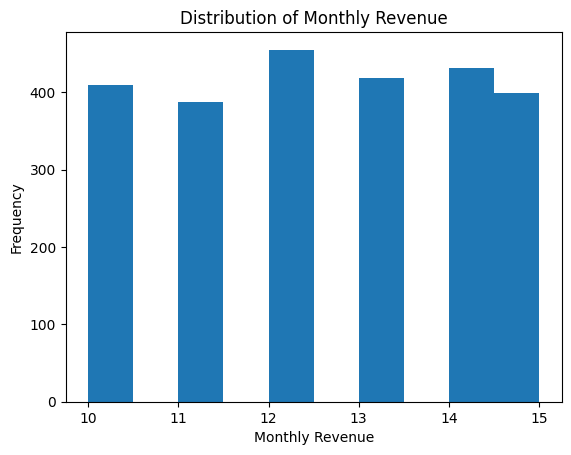

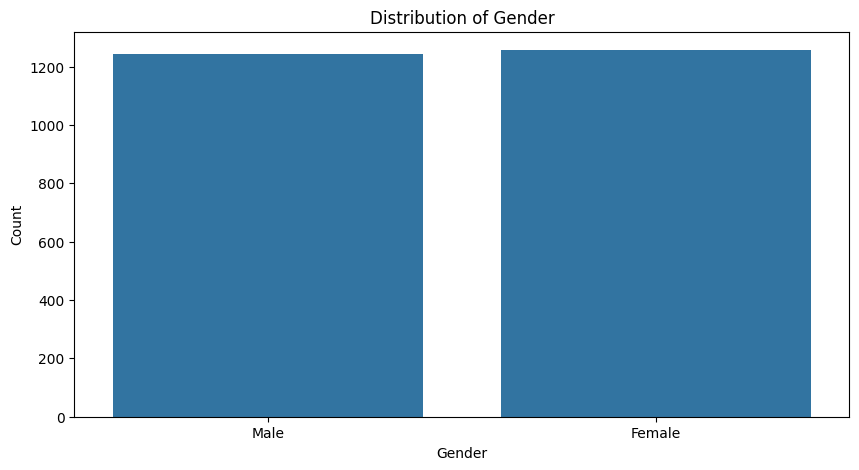

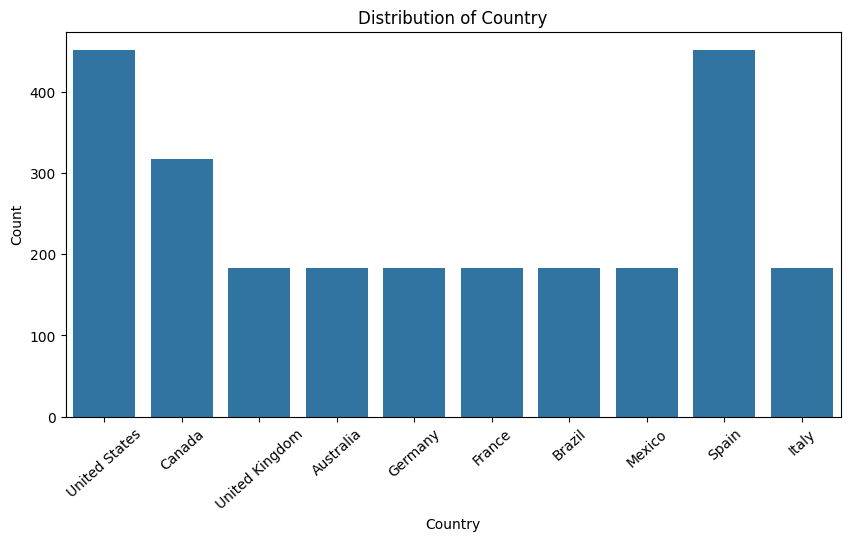

In [4]:
#Descriptive Statistics:
df_dummies.describe()


#Distribution of Monthly Revenue
plt.hist(df_dummies['Monthly Revenue'])
plt.xlabel('Monthly Revenue')
plt.ylabel('Frequency')
plt.title("Distribution of Monthly Revenue")
plt.show()


plt.figure(figsize=(10, 5))
sne.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 5))
sne.countplot(x='Country', data=df)
plt.title('Distribution of Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=42)
plt.show()

#**4.Linear Regression Model**

In [5]:
#Build the Model:
model = LinearRegression()
model.fit(X, y)

#Model Evaluation:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R-squared:", r2)
print("RMSE:", rmse)
print("MAE:", mae)
print("MSE:", mse)

R-squared: 0.1732329080604612
RMSE: 1.5111782434919279
MAE: 1.2459240940465792
MSE: 2.2836596836033487


#**5.Comparative Analysis and Visualization**

In [17]:
lr_coefficients = pd.DataFrame(model.coef_)
print("\nLinear Regression Coefficients:")
print(lr_coefficients)



Linear Regression Coefficients:
            0
0   -0.000090
1   -0.003617
2    0.018397
3   -0.037761
4   -3.144191
..        ...
336  0.120033
337 -0.031754
338 -0.133734
339 -0.204906
340 -0.029502

[341 rows x 1 columns]
